In [1]:
from viresclient import SwarmRequest
import datetime as dt
import numpy as np
%matplotlib inline

In [2]:
request = SwarmRequest()
request.available_measurements("EEF")

['EEF', 'RelErr', 'flags']

Fetch all the EEF values from Bravo during 2016.

In [3]:
request.set_collection("SW_OPER_EEFBTMS_2F")
request.set_products(measurements=["EEF"])
data = request.get_between(
    dt.datetime(2016,1,1),
    dt.datetime(2017,1,1)
)

[1/1] Processing:  100%|██████████|  [ Elapsed: 00:03, Remaining: 00:00 ]
      Downloading: 100%|██████████|  [ Elapsed: 00:00, Remaining: 00:00 ] (0.246MB)


In [4]:
df = data.as_dataframe()
df.head()

,Spacecraft,Latitude,Longitude,EEF
2016-01-01 00:52:25,B,7.187098,113.751205,-0.000758
2016-01-01 02:27:08,B,7.466371,89.976870,-0.000659
2016-01-01 04:02:05,B,6.861260,66.179520,-0.000349
2016-01-01 05:36:45,B,7.330604,42.410120,-0.000203
2016-01-01 07:10:50,B,10.010381,18.697549,-0.000235


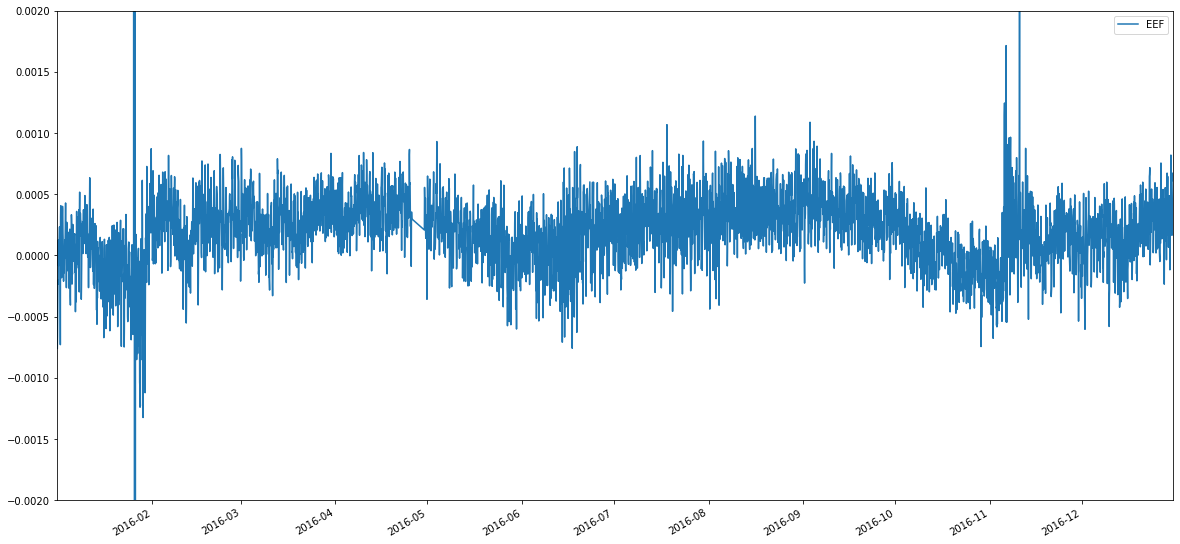

In [5]:
ax = df.plot(y="EEF", figsize=(20,10))
ax.set_ylim((-0.002, 0.002));

Take a look at the time jumps between entries...

In [6]:
times = df.index
np.unique(np.sort(np.diff(times.to_pydatetime())))[:20]

array([datetime.timedelta(days=-1, seconds=1117), datetime.timedelta(0),
       datetime.timedelta(seconds=2561), datetime.timedelta(seconds=2616),
       datetime.timedelta(seconds=2620), datetime.timedelta(seconds=2712),
       datetime.timedelta(seconds=2786), datetime.timedelta(seconds=2838),
       datetime.timedelta(seconds=2901), datetime.timedelta(seconds=3011),
       datetime.timedelta(seconds=3066), datetime.timedelta(seconds=3126),
       datetime.timedelta(seconds=5489), datetime.timedelta(seconds=5490),
       datetime.timedelta(seconds=5491), datetime.timedelta(seconds=5492),
       datetime.timedelta(seconds=5493), datetime.timedelta(seconds=5494),
       datetime.timedelta(seconds=5495), datetime.timedelta(seconds=5496)],
      dtype=object)